<h1> Logistic Regression Model </h1>

<h3> Analysis </h3>

The goal of this analysis is to create a logistic regression model that can detect whether an email is spam or not. This can be used to help filter out spam emails to avoid cluttering an employees inbox. 

<h4> Data and Exploratory Analysis </h4>

In [1]:
#Import Libraries and file for project
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#Load the file into a dataframe
df = pd.read_csv('/Users/Ryan/Code/Data645/spambase.csv')

In [2]:
#Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

<H3> Data Information </h3>

The dataset is a collection of emails that either spam or not spam.  The dataset contains a totla of 4,601 emails with 57 different columns that can be used to indicate whether the email is spam or not.  All of the columns are floats except for 3 of them and there is no null values in the dataset. 

The last column is the target variable.  It is a binary variable in which 1 means the email is spam and 0 means that email is not spam.  

The variables are broken down into different categories:
- <b> Word Frequency Variables </b> - these give the percentage of times a particular words appears in the email out of the total words. 
- <b> Character Frequencey Variables </b> - These measure how frequently a character appears, such as punctuation marks that are often overused in spam. 
- <b> Capital Run Length Variabels </b> - These capture patterns in the capital letters being used such as the average length of the sequence of consecutive letters, the length of the longest sequence of consecutive capital letters, and the total number of cpaital letters being used.
- <b> Target Variabel </b> - Spam variable in which 1 means it spam and 0 means it not spam. 


In [3]:
#Data Exploration Using describe()

df.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

<H3> Key Takeaways</H3>

- The spam column is the first thing to examine. It has a min of 0 and a max of 1 which indicates that all of the values in the column produce a useable output.  The mean is 0.394045 which tells us that ~39% of the emails are not spam and ~ 61% of the emails are spam.  

- The word frequency variables show us that the average email contains these words individually is less that 0.3% of the total words in the email due to the means all being less than 0.3.  Some of the emails do not contain these words individually with the min for all of them being 0. While other emails contain some of these words individually as much as 42.8% of the total words in the email with the max for "3d" being 42.81.  

- The char frequency variables show us that some emails contain these characters individually while other emails contain these characters individually as much as 32% of the total characters in an email.  The char frequency mean again is less than 0.3% for all the total characters individually.  

- The capital run length variables show us that there is a large range in the total length of capital letters used in a sequence. The min is 1 meaning that only 1 capital letter in a row was used in an entire email while the max being 15,841 letters in a row that were capital.  The mean average length of capital letters in a sequence was 5.



Text(0.5, 1.0, 'Histogram: "Make" Word Frequency')

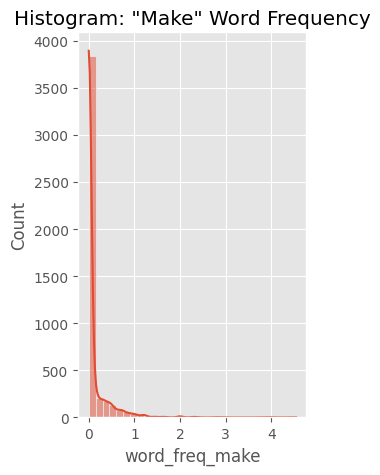

In [4]:
# Histogram of the word frequency of the word "Make"
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df['word_freq_make'], kde=True, bins=30)
plt.title('Histogram: "Make" Word Frequency')

Text(0.5, 1.0, 'Histogram: Longest Capital Letter Sequence')

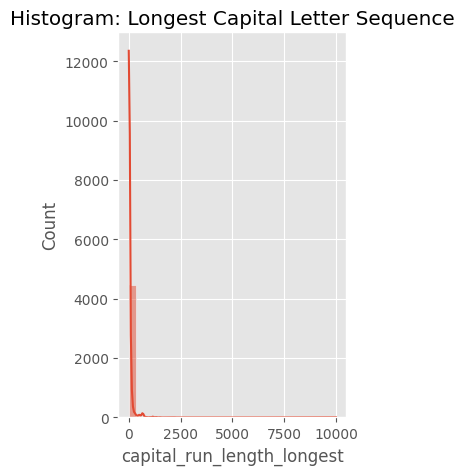

In [5]:
# Histogram of Capital Run Length Longest
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 2)
sns.histplot(df['capital_run_length_longest'], kde=True, bins=30)
plt.title('Histogram: Longest Capital Letter Sequence')

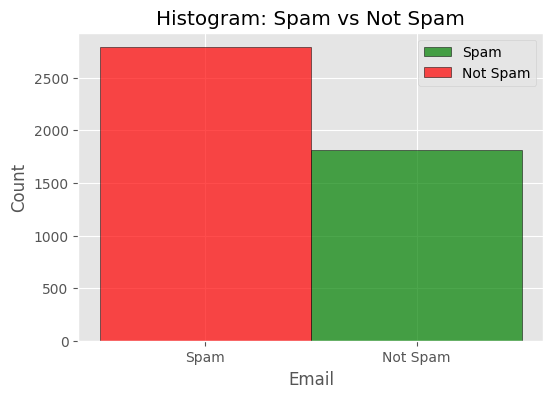

In [6]:
# Histogram of Spam 
plt.figure(figsize=(6, 4))
plt.hist(df[df['spam'] == 1]['spam'], bins=1, edgecolor='black', color='green', label='Spam', alpha=0.7)
plt.hist(df[df['spam'] == 0]['spam'], bins=1, edgecolor='black', color='red', label='Not Spam', alpha=0.7)
plt.xticks([0, 1], ['Spam', 'Not Spam'])
plt.xlabel('Email')
plt.ylabel('Count')
plt.title('Histogram: Spam vs Not Spam')
plt.legend()
plt.show()

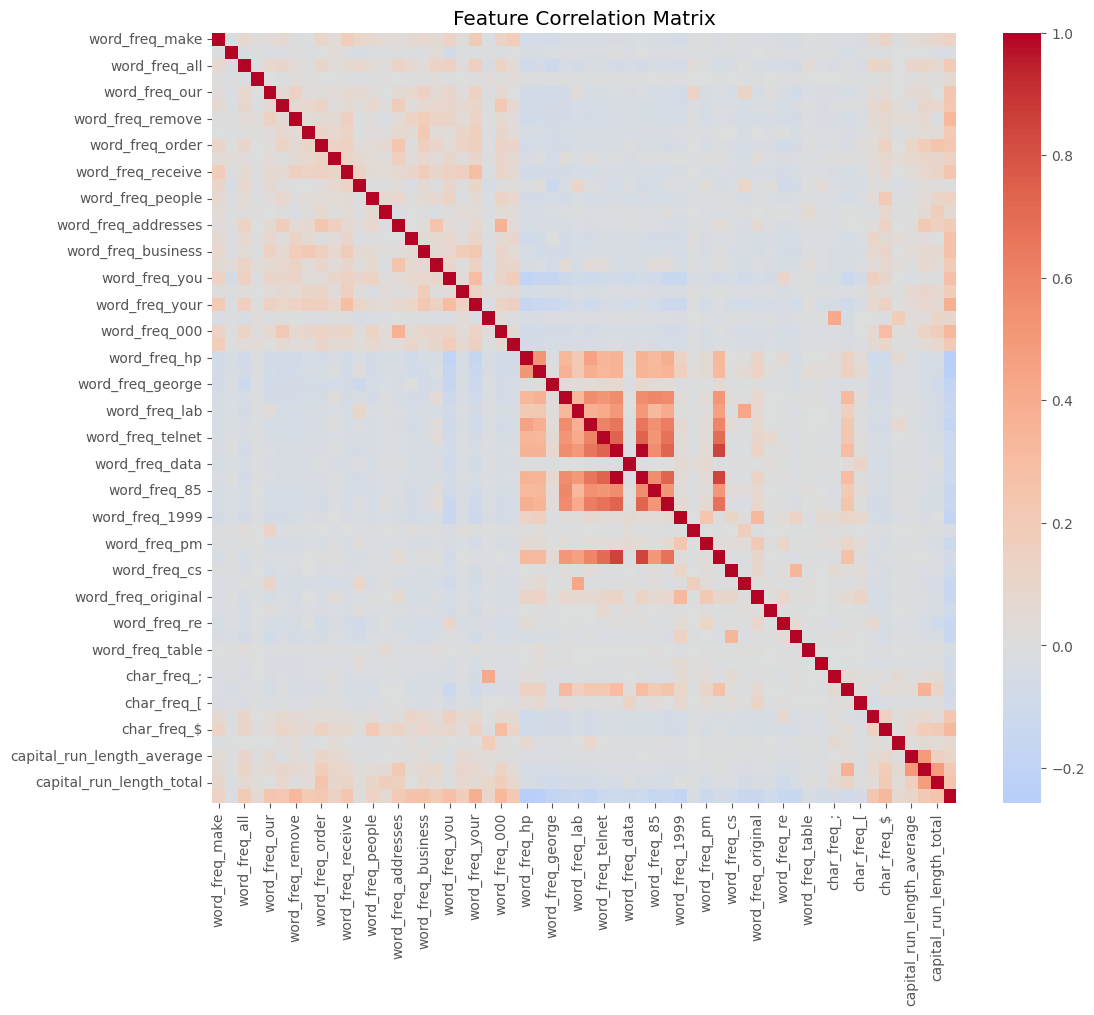

spam                        1.000000
word_freq_your              0.383234
word_freq_000               0.334787
word_freq_remove            0.332117
char_freq_$                 0.323629
word_freq_you               0.273651
word_freq_free              0.263215
word_freq_business          0.263204
capital_run_length_total    0.249164
word_freq_our               0.241920
Name: spam, dtype: float64
word_freq_meeting   -0.136615
word_freq_re        -0.140408
word_freq_edu       -0.146138
word_freq_85        -0.149225
word_freq_650       -0.158800
word_freq_labs      -0.171095
word_freq_1999      -0.178045
word_freq_george    -0.183404
word_freq_hpl       -0.232968
word_freq_hp        -0.256723
Name: spam, dtype: float64


In [7]:
#Heatmap of Features Correlation

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

target_corr = corr['spam'].sort_values(ascending=False)
print(target_corr.head(10))  # top positive
print(target_corr.tail(10))  # top negative

The key takeaways from this is that the frequency of your, 000, remove, $, you, free, and business are highly correlated. While words like meeting, edu, 85 are not. 

<h4> PCA </h4>

In [8]:
#Preprocessing

#Create a list of the features to be used in the PCA. 
features_pca = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
    'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'
]

# Scale the data using Standard Scaler so that the data has a mean of O and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_pca])

In [9]:
# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check results
print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")
print("Explained variance ratios:", pca.explained_variance_ratio_)


Original shape: (4601, 57)
Reduced shape: (4601, 48)
Explained variance ratios: [0.11564794 0.05732324 0.03514302 0.02830104 0.02712645 0.02565859
 0.02480672 0.02412138 0.02272431 0.02240252 0.02134959 0.01982635
 0.01950495 0.01921227 0.01907075 0.01865735 0.01839724 0.01795403
 0.01776603 0.01759324 0.01747217 0.01716253 0.01692163 0.01651482
 0.01643138 0.01621644 0.01605889 0.01587088 0.01532317 0.01519297
 0.01467534 0.01450406 0.01399424 0.01371411 0.01362491 0.01325486
 0.01287859 0.01268524 0.01236124 0.01210273 0.01183517 0.01168412
 0.01086169 0.01067458 0.0102082  0.01012427 0.00920093 0.00857399]


In [10]:
# Create a data frame for PCA components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add the target variable back
pca_df['spam'] = df['spam']

In [11]:
#Print the PCA data frame to ensure that spam was added back in and to see the data frame. 
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,spam
0,-0.731750,-0.043026,-0.580662,-0.251143,-0.174836,-0.569760,0.050593,0.071795,0.415564,-0.809260,1.200639,0.181896,-0.130332,0.192576,0.524647,-0.024073,0.324701,0.060909,-0.005689,0.202864,0.560772,0.280133,0.238051,-0.172879,0.134032,-0.782098,0.699734,-0.151878,0.632180,0.247401,-0.333801,0.312834,0.381417,-0.276600,-0.397364,-0.099377,-0.335870,-0.258058,-0.104601,0.328918,-0.025611,0.072388,0.682891,0.052138,-0.162968,-0.208357,0.143936,0.339344,1
1,-1.185084,2.067850,0.036035,0.430459,-0.327619,-0.826688,0.490183,0.621681,-0.883679,0.351408,-0.020531,0.087014,-0.038038,-0.460931,-0.406051,0.717032,0.006167,-0.215032,-0.310994,0.255470,-0.260820,-0.187910,-0.329785,-0.120155,0.456406,-0.363073,-0.440246,0.186025,0.076097,0.267539,0.783091,0.435887,-0.033024,0.419885,-0.043498,0.055593,0.501583,0.051902,-0.532830,-0.163981,0.288200,0.378792,0.230267,0.139854,-0.156299,0.291900,-0.141545,0.262410,1
2,-1.467595,5.023754,3.277591,0.995065,0.641304,-2.784683,1.844471,-2.097819,1.982749,0.259473,0.377570,0.333630,-1.213678,0.460524,0.741083,-0.585342,0.548879,0.558928,-0.092105,-0.129016,-1.381822,-0.282537,-0.307954,-0.032640,-0.357726,0.097241,1.711296,-0.930142,0.016027,0.268787,0.607704,-0.559370,-0.227790,-1.981600,-0.146184,-0.018034,0.345935,-0.555554,-1.216762,-1.672497,0.280127,0.052592,-0.394560,-0.709672,0.295599,-0.079436,-0.625527,-1.131376,1
3,-0.805347,0.427503,-0.583107,-0.008242,-0.077464,0.547862,-0.404900,-0.459410,0.160853,0.260453,-0.341065,-0.160904,-0.268722,-0.298462,-0.136423,0.686559,-0.115256,-0.041917,-0.144562,0.354468,-0.473740,-0.484673,-0.198434,0.436312,0.705479,-0.266139,-0.330823,-0.187916,0.165268,-0.255200,0.400553,0.695730,-0.535250,-0.023300,0.478965,0.017376,-0.412644,0.002961,-0.254880,-1.088386,-0.382526,-0.278213,-0.467940,0.216300,-0.238498,-0.840444,0.410776,0.107400,1
4,-0.806279,0.426747,-0.585155,-0.008167,-0.077655,0.547753,-0.403780,-0.461120,0.160601,0.261989,-0.340642,-0.160317,-0.268970,-0.299221,-0.135125,0.686806,-0.115457,-0.041378,-0.145328,0.354088,-0.474461,-0.486393,-0.197866,0.433742,0.704947,-0.266518,-0.330078,-0.186882,0.165911,-0.257666,0.401881,0.694572,-0.535489,-0.022654,0.479424,0.018205,-0.413827,0.002230,-0.254747,-1.087952,-0.382583,-0.276466,-0.466795,0.216558,-0.238331,-0.840652,0.409227,0.106594,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-0.454406,-0.740464,-0.142942,-0.258755,0.386438,-0.549871,-0.041711,0.426852,-0.391706,0.390676,0.700340,-0.472639,-0.582144,0.682757,-0.674789,-0.502740,0.352167,-0.150412,0.165107,-0.362777,0.307735,0.315440,-0.392567,0.110748,-0.699159,-0.056054,-0.387385,0.060353,0.024359,-0.037619,-0.146581,0.330588,0.111985,0.149416,0.402955,0.366952,0.639977,-0.623834,0.484573,0.360531,-0.668953,0.091673,-0.229323,-0.130889,0.262062,0.007747,0.031015,-0.135298,0
4597,-0.780016,-0.636617,-1.094297,0.436243,-1.106634,0.137893,-0.374169,1.488182,0.437543,0.405634,0.266395,-0.262485,-0.202398,0.577181,0.438820,0.295221,-0.107155,0.218075,0.017218,0.126265,-0.468738,-0.282394,-0.364633,-0.375654,0.292368,0.008665,-0.255963,0.044823,-0.202974,0.118533,0.285083,0.014258,-0.767589,-0.283483,-0.634773,-0.046546,-1.231157,-0.109897,-0.524355,0.339855,1.429538,-0.491710,-0.148090,0.820998,0.610906,-0.492653,-0.238649,-0.040684,0
4598,-0.261878,-0.417820,0.333300,0.091170,0.037927,-0.484281,-0.061387,1.025764,-0.042442,0.444760,1.162245,0.128524,-0.370790,0.355884,-0.851804,-0.062921,0.625494,-0.219349,0.203294,0.370864,0.415121,0.478216,-0.756031,0.695067,0.805369,-0.194691,0.223606,-0.140858,0.496224,0.942932,-0.409976,0.453637,0.306396,-0.4850

<h4> Logistic Regression Model </h4>

In [12]:
# Split features and target
X = pca_df.drop('spam', axis=1)
y = pca_df['spam']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Initialize and fit the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<h3> Output </h3>

In [14]:
# Predict on test set
y_pred = log_reg.predict(X_test)

# Classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Model coefficients
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:")
print(coefficients.sort_values(key=abs, ascending=False))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       804
           1       0.93      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.92      1381
weighted avg       0.92      0.92      0.92      1381

Confusion Matrix:
[[767  37]
 [ 74 503]]
Logistic Regression Coefficients:
PC2     2.677759
PC38   -2.333205
PC37   -1.737693
PC1    -1.682512
PC16    1.419792
PC44   -1.292245
PC33   -1.183779
PC20    1.124005
PC39    1.070203
PC10   -1.043842
PC21    1.033930
PC25   -0.970504
PC19    0.932214
PC5    -0.914952
PC13    0.837760
PC36   -0.758724
PC27   -0.736158
PC32   -0.722894
PC41   -0.624830
PC34   -0.572694
PC15   -0.561874
PC35    0.529349
PC26   -0.527139
PC22    0.501408
PC14    0.466655
PC31    0.461626
PC4    -0.436411
PC46    0.404230
PC23   -0.386075
PC45   -0.380283
PC6     0.371077
PC18    0.354554
PC7     0.341983
PC48   -0.2760

<b>For Not Spam: </b>
Precision: 91% — when the model says “not spam,” it’s right 91% of the time.

Recall: 95% — the model catches 95% of all the actual non spam emails.

F1: 93% — overall strong on not spam detection.

<b> For Spam: </b>
Precision: 93% — strong confidence when the model says something is spam.

Recall: 87% — the model catches 87% of actual spam emails.

F1: 90% — very solid performance overall.

<b> Accuracy: 92% </b>
The model correctly predicts spam vs. not spam 92% of the time.

<b> Confusion Matrix </b>
- 767 real not-spam emails were correctly labeled
- 503 real spam emails were correctly caught
- 37 not-spam got mistakenly flagged as spam
- 74 spam emails slipped through undetected


<b> PCA </b>
- Positive values → push the prediction toward spam
- Negative values → push the prediction toward not spam
- Bigger absolute values = more influence on the prediction

<b> Results </b>
- The model has a 92% accuracy, good balance between precision and recall.
- It’s slightly better at identifying not-spam than spam, but still strong overall.
- The top PCs (like PC2 and PC38) are driving most of the prediction decisions.

In [16]:
# Get the loadings (aka weights of each original feature on each PC
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=features_pca)

# Top features contributing to PC2
print("Top contributors to PC2:")
print(loadings['PC2'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC38
if 'PC38' in loadings.columns:
    print("\nTop contributors to PC38:")
    print(loadings['PC38'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC37
if 'PC37' in loadings.columns:
    print("\nTop contributors to PC37:")
    print(loadings['PC37'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC1
if 'PC1' in loadings.columns:
    print("\nTop contributors to PC1:")
    print(loadings['PC1'].sort_values(key=np.abs, ascending=False).head(5))

# Top features for PC16
if 'PC16' in loadings.columns:
    print("\nTop contributors to PC16:")
    print(loadings['PC16'].sort_values(key=np.abs, ascending=False).head(5))

Top contributors to PC2:
word_freq_your                0.272438
capital_run_length_longest    0.252399
word_freq_000                 0.247942
char_freq_$                   0.235966
word_freq_order               0.235004
Name: PC2, dtype: float64

Top contributors to PC38:
word_freq_your      0.337772
word_freq_george    0.271818
word_freq_make     -0.265696
word_freq_cs        0.221218
char_freq_$         0.215242
Name: PC38, dtype: float64

Top contributors to PC37:
word_freq_all         0.431049
word_freq_business    0.264754
char_freq_$          -0.264465
word_freq_re          0.251987
word_freq_pm         -0.241609
Name: PC37, dtype: float64

Top contributors to PC1:
word_freq_857           0.348450
word_freq_415           0.347547
word_freq_direct        0.320177
word_freq_technology    0.316669
word_freq_telnet        0.311919
Name: PC1, dtype: float64

Top contributors to PC16:
word_freq_address       0.427954
word_freq_george       -0.373017
word_freq_mail          0.306681
wor

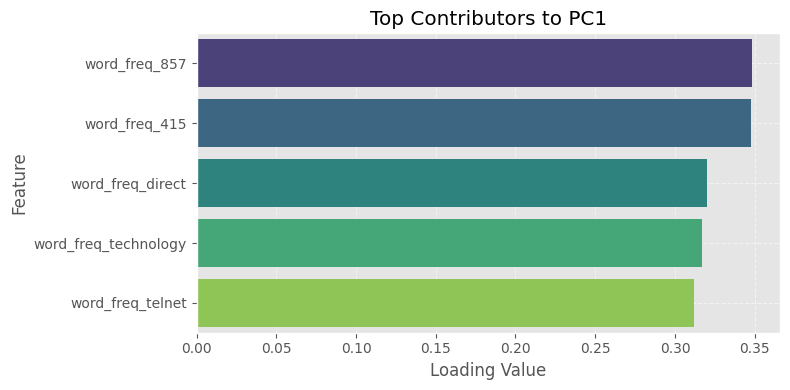

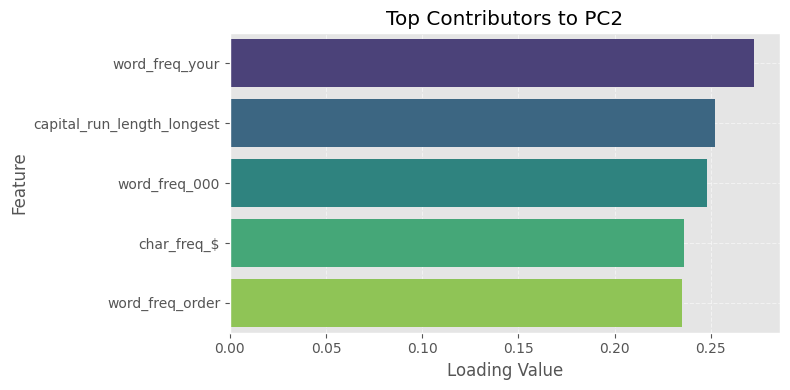

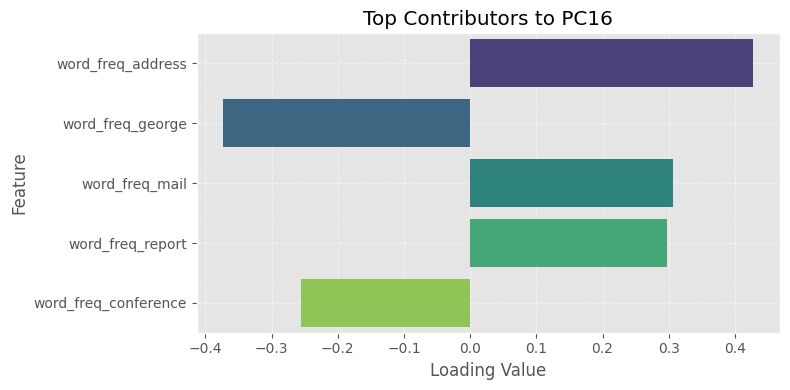

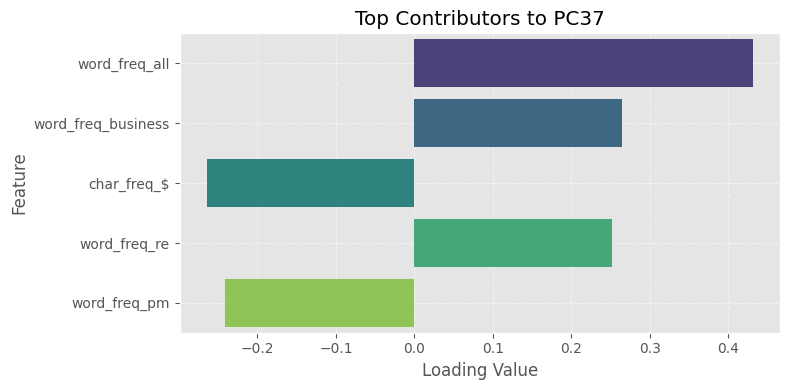

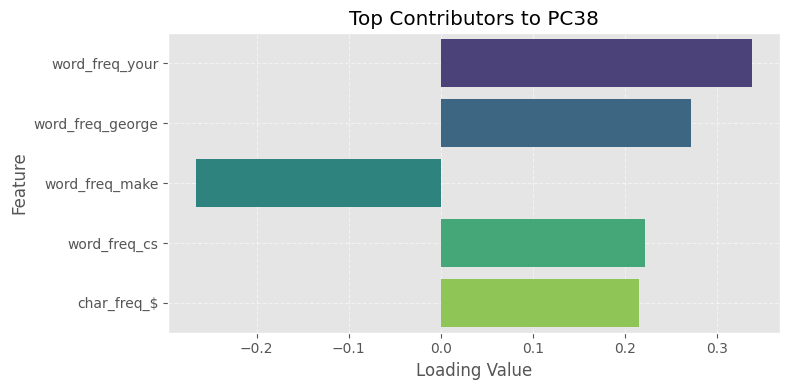

In [17]:
# PCs To Plot
pcs_to_plot = ['PC1', 'PC2', 'PC16', 'PC37', 'PC38']

for pc in pcs_to_plot:
    if pc in loadings.columns:
        top_features = loadings[pc].sort_values(key=np.abs, ascending=False).head(5)

        plt.figure(figsize=(8, 4))
        sns.barplot(
            x=top_features.values,
            y=top_features.index,
            hue=top_features.index,       
            palette='viridis',
            dodge=False,
            legend=False                  
        )
        plt.title(f"Top Contributors to {pc}")
        plt.xlabel("Loading Value")
        plt.ylabel("Feature")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

<h3> Conclusion </h3>

<h4> Summary </h4>

The main findings was that the word frequency of certain words played a large role in predicting if an email was spam.  We see that char_frq_$ was very important to the PCA. The model has a 92% accuracy, good balance between precision and recall. The model was slightly better at identifying not spam emails than spam, but still strong overall. The top PCs are driving most of the prediction decisions.

<h4> Limitations </h4>

The limitations of the analysis was the spam detection did not account for the length the email has been in use, or if the person has contacted that email address before.  

<h4> Improvement Areas </h4>

The ways that this analysis could be improved would be if the user has emailed that email address before with a 1 = yes and 0 = no.  It is very unlikely an email is spam if the user has emailed that email before.  The second would be how long the email address has been active in months. Spam emailers typically need to make new email addresses. 